<h1><b>Image classification and product recommendation

<b>Installing necessary libraries

<b>OpenCV</b> is a huge open-source library for computer vision, machine learning, and image processing. It can process images and videos to identify objects, faces, or even the handwriting of a human.

In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


<b>TensorFlow</b> is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

In [2]:
pip install tensorflow

<b>Keras</b> is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

In [3]:
pip install keras

<b>Word Cloud</b> is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud

In [3]:
pip install wordcloud

In [4]:
# General imports
from collections import Counter
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import requests
import urllib
import cv2
import re
from io import BytesIO
import PIL.Image
#from PIL import Image
import requests, os
from os import path
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers 
from keras.layers.core import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from wordcloud import WordCloud
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix

<u>Loading the Dataset

In [5]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\seminar\new.csv")

In [90]:
df.head()

,Unnamed: 0,product_name,product_price,product_reviews,product_image,output
0,0,Men's Rugged Professional Cap,16.99,"6,387",https://m.media-amazon.com/images/I/91tgXrB27K...,hat
1,1,Men's Athletic Baseball Fitted Cap,11.99,"18,325",https://m.media-amazon.com/images/I/61pSuZP7SV...,hat
2,2,Men's Superlite Relaxed Adjustable Performance...,24.00,"6,878",https://m.media-amazon.com/images/I/71qx1PZy3a...,hat
3,3,Unisex-Adult PFG Mesh Fish Flag Ball Cap,24.04,"5,086",https://m.media-amazon.com/images/I/619C+F3rkp...,hat
4,4,Men's Ameritage Dad Adjustable Cap,22.00,"6,541",https://m.media-amazon.com/images/I/818smS7zne...,hat


In [91]:
df.columns

Index(['Unnamed: 0', 'product_name', 'product_price', 'product_reviews',
       'product_image', 'output'],
      dtype='object')

In [7]:
#df.columns.str.match("Unnamed")
#df.loc[:,~df.columns.str.match("Unnamed")]

In [8]:
list(zip(df.columns,df.dtypes,df.nunique()))

[('Unnamed: 0', dtype('int64'), 1196),
 ('product_name', dtype('O'), 724),
 ('product_price', dtype('float64'), 278),
 ('product_reviews', dtype('O'), 594),
 ('product_image', dtype('O'), 667),
 ('output', dtype('O'), 5)]

The <b>loc </b> property is used to access a group of rows and columns by label(s) or a boolean array. ... A boolean array of the same length as the axis being sliced

In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


#keep_col = ['product_name','product_price','product_reviews','product_image']
#new_f = df[keep_col]
#new_f.to_csv("combined.csv", index=False)

In [10]:
df.tail()

,product_name,product_price,product_reviews,product_image,output
1191,Men's Regular Fit Active Waist Work Pants,29.99,111,https://m.media-amazon.com/images/I/81WKKKYF7j...,pant
1192,Under Armour,65.00,148,https://m.media-amazon.com/images/I/51omu5A1VB...,pant
1193,Men's Tech Tapered Pants,65.00,148,https://m.media-amazon.com/images/I/51omu5A1VB...,pant
1194,Quiksilver,65.00,148,https://m.media-amazon.com/images/I/81brgaFNn-...,pant
1195,Men's Kracker Cord Pant,65.00,148,https://m.media-amazon.com/images/I/81brgaFNn-...,pant


In [11]:
df.isna().sum()

product_name       0
product_price      0
product_reviews    0
product_image      0
output             0
dtype: int64

In [12]:
#df.fillna(df.mean())

In [13]:
#df.isna().sum()

In [14]:
#df["product_price"].fillna( method ='ffill', inplace = True)

In [15]:
from IPython.display import Image

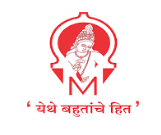

In [16]:
Image(filename =r"C:\Users\Admin\Desktop\mmcoe.png", width=100, height=100)

An additional column called "PID" (Product ID) is added as a proxy for Product's ASIN number in Amazon

In [45]:
df=df.reset_index()
df=df.rename(columns={"index":"PID"})
df.head(5)

,PID,Unnamed: 0,product_name,product_price,product_reviews,product_image,output
0,0,0,Men's Rugged Professional Cap,16.99,"6,387",https://m.media-amazon.com/images/I/91tgXrB27K...,hat
1,1,1,Men's Athletic Baseball Fitted Cap,11.99,"18,325",https://m.media-amazon.com/images/I/61pSuZP7SV...,hat
2,2,2,Men's Superlite Relaxed Adjustable Performance...,24.00,"6,878",https://m.media-amazon.com/images/I/71qx1PZy3a...,hat
3,3,3,Unisex-Adult PFG Mesh Fish Flag Ball Cap,24.04,"5,086",https://m.media-amazon.com/images/I/619C+F3rkp...,hat
4,4,4,Men's Ameritage Dad Adjustable Cap,22.00,"6,541",https://m.media-amazon.com/images/I/818smS7zne...,hat


<b>Exploratory Data Analysis

In [18]:
# Checking the unique observations, datatype & null values for every feature
d = {"Feature":[i for i in df.columns]    ,"Nunique" :df.nunique().values ,'Type' : df.dtypes.values, "No: of nulls" : df.isnull().sum() }
description = pd.DataFrame( d)
description

,Feature,Nunique,Type,No: of nulls
PID,PID,1196,int64,0
product_name,product_name,724,object,0
product_price,product_price,278,float64,0
product_reviews,product_reviews,594,object,0
product_image,product_image,667,object,0
output,output,5,object,0


In [19]:
#df['product_name'].fillna(value = "Not Given" , inplace = True)
#df['product_reviews'].fillna(value = 0 , inplace = True)

#df['product_price'].fillna(value = 0 , inplace = True)

In [20]:
# Some of the price values contain a '$' before the number, we will remove it
#df["product_price"] = df["product_price"].replace({'\$':''}, regex = True)

In [21]:
# Changing the data type from object to float
df["product_price"]=df["product_price"].astype(float)

<u>Product Price and Rating Analysis

In [22]:
df.describe()

,PID,product_price
count,1196.000000,1196.000000
mean,597.500000,45.425460
std,345.399768,39.643242
min,0.000000,3.990000
25%,298.750000,28.540000
50%,597.500000,37.990000
75%,896.250000,49.990000
max,1195.000000,588.980000


(0.0, 1000.0)

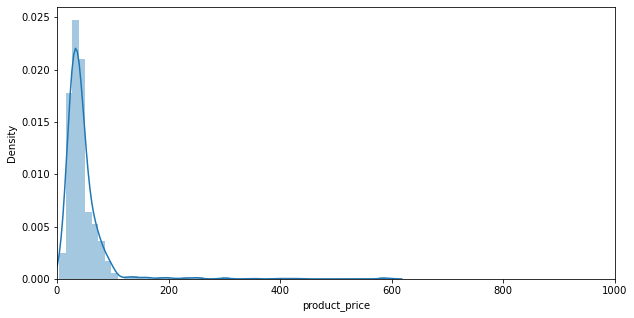

In [23]:
plt.figure(figsize=(10,5))
ax=sns.distplot(df["product_price"])
ax.set_xlim(0, 1000)

<b>Product name

<u>Usage of the WordCloud Python library is to create word clouds of the words in the title of each of the apparel type

In [24]:
def product_join(name):
    """
    This functions takes apparel type and returns product name joined with a space
  
    """
    return " ".join(t for t in df[df["output"]==name].product_name)

<b>Masking</b> is an image processing method in which we define a small 'image piece' and use it to modify a larger image. 

In [25]:
# Load the mask images
pant_mask = np.array(PIL.Image.open(path.join(r"C:\Users\Admin\Desktop\seminar\images_note\images_note\pant.jpeg")))
hat_mask = np.array(PIL.Image.open(path.join(r"C:\Users\Admin\Desktop\seminar\images_note\images_note\hat.jpeg")))
shoes_mask = np.array(PIL.Image.open(path.join(r"C:\Users\Admin\Desktop\seminar\images_note\images_note\shoes.jpeg")))
shirt_mask = np.array(PIL.Image.open(path.join(r"C:\Users\Admin\Desktop\seminar\images_note\images_note\shirt.jpeg")))
watch_mask = np.array(PIL.Image.open(path.join(r"C:\Users\Admin\Desktop\seminar\images_note\images_note\watch.jpeg")))
list_masks = [pant_mask, hat_mask, shoes_mask, shirt_mask, watch_mask] 
list_name=["pant", "hat", "shoes", "shirt", "watch"] 

The product titles are displayed like the product category's image (pant, hat, shoes, shirt, watch)

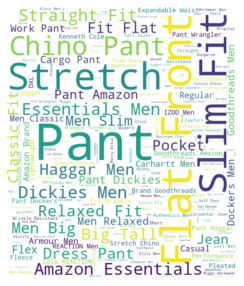

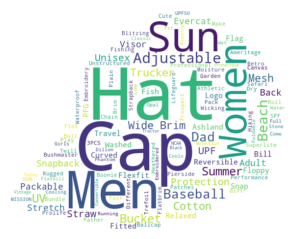

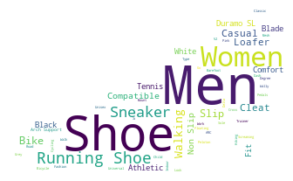

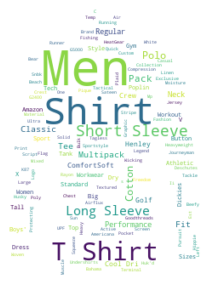

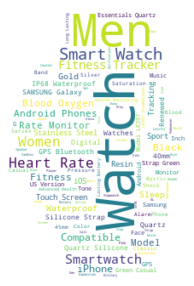

In [26]:
for i in range(len(list_masks)):
    wordcloud = WordCloud(background_color="white",  mask=list_masks[i]).generate(product_join(list_name[i]))
    plt.figure(figsize=[5,5])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Product category - Response variable

In [27]:
pd.DataFrame(df['output'].value_counts())

,output
pant,1000
shirt,51
watch,50
shoes,48
hat,47


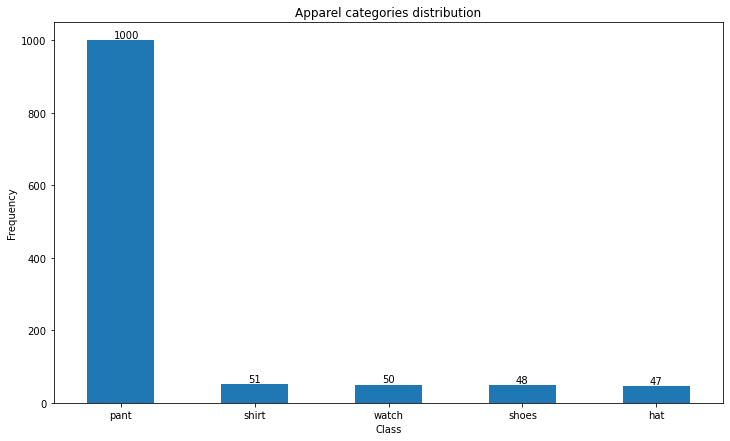

In [28]:
# Creating a plot to check class distribution
plt.figure(figsize=(12,7))# Creating an empty plot 
count_classes = pd.value_counts(df['output'], sort = True)
ax=count_classes.plot(kind = 'bar', rot=0)
plt.title("Apparel categories distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
for p in ax.patches:
      ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+6)) # Adding the count above the bars
plt.show()

<b>Images

Let's display the actual image. 

In [32]:
def display_img(url):
    """
    This functions takes the image url and return the picture of the image
    """
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = PIL.Image.open(BytesIO(response.content))
    # we will display it in notebook 
    return plt.imshow(img)

hat


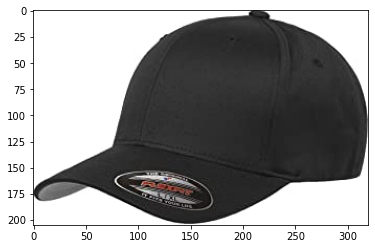

In [33]:
display_img(df['product_image'][1])
print(df['output'][1])

pant


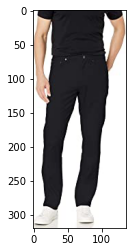

In [34]:
display_img(df['product_image'][500])
print(df['output'][500])

pant


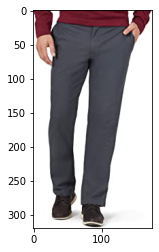

In [38]:
display_img(df['product_image'][800])
print(df['output'][800])

pant


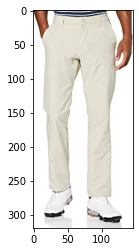

In [37]:
display_img(df['product_image'][1000])
print(df['output'][1000])

<u>Downloading the images on device

In [46]:
# downlaod images for these  data points(using id), run once
#  for idx, row in df.iterrows():
#     url = row['product_image']
#     response = requests.get(url)
#     img = PIL.Image.open(BytesIO(response.content))
#     img.save(r'C:\Users\Admin\Desktop\seminar\images'+ str(row['PID'])+'.jpeg')

<b>Image Classification

The objective of this section to identify the correct category of product from a random image i.e. if its a watch, shoe, shirt, pant or a hat.

This section is divided into three parts:

1. Since our data has images stored as a link in a csv file, we will first create a function which extracts the images from the    links and convert them into arrays.
2. In the second step we will perform the train/test split and run the classification model.
3. For the prediction part, we pick a random image from the test data, then identify it's correct category.

In [6]:
# creating a function to download the image links from the dataset
def img_array(img):   
    """
    This function takes in an image and converts the image to an array after resizing
  
    """
    response = urllib.request.urlopen(img)
    image = np.asarray(bytearray(response.read()), dtype="uint8") 
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, (224,224)) # resizing all images to one size 
    return image_bgr

In [7]:
# Using the above function here to store all the images in the dataset into arrays
image_array=[]
for i in df['product_image']:
    image_array.append(img_array(i))
    
img_arr=np.array(image_array)

In [8]:
# Converting the response variable into numbers
df['output'][df['output']=='pant' ]=0
df['output'][df['output']=='hat' ]=1
df['output'][df['output']=='shirt' ]=2
df['output'][df['output']=='shoes' ]=3
df['output'][df['output']=='watch' ]=4
df['output']=df['output'].astype(int)

We would be using a small training size to avoid kernel crash. To overcome the small training size(underfitting), we would increase the number of epochs in the later section during the compilation of the model.

In [25]:
# Splitting the data
train_images, test_images, train_labels, test_labels=train_test_split(img_arr, df['output'], test_size=0.60, random_state=42)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
set_seed(42) #setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=train_images[0].shape, kernel_regularizer=regularizers.l1(1e-5)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(5, activation='softmax'))

In [11]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
model = cnn.fit(train_images, train_labels, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))

Epoch 1/10
12/12 [==============================] - 95s 7s/step - loss: 0.8234 - accuracy: 0.7670 - val_loss: 0.8688 - val_accuracy: 0.8333
Epoch 2/10
12/12 [==============================] - 94s 8s/step - loss: 0.5749 - accuracy: 0.8272 - val_loss: 0.7449 - val_accuracy: 0.8333
Epoch 3/10
12/12 [==============================] - 122s 10s/step - loss: 0.4091 - accuracy: 0.8613 - val_loss: 0.5217 - val_accuracy: 0.8333
Epoch 4/10
12/12 [==============================] - 114s 10s/step - loss: 0.4065 - accuracy: 0.8613 - val_loss: 0.4305 - val_accuracy: 0.8750
Epoch 5/10
12/12 [==============================] - 115s 10s/step - loss: 0.3153 - accuracy: 0.8874 - val_loss: 0.3976 - val_accuracy: 0.8958
Epoch 6/10
12/12 [==============================] - 109s 9s/step - loss: 0.2675 - accuracy: 0.8874 - val_loss: 0.4029 - val_accuracy: 0.8958
Epoch 7/10
12/12 [==============================] - 114s 10s/step - loss: 0.2288 - accuracy: 0.9162 - val_loss: 0.3767 - val_accuracy: 0.8854
Epoch 8/10


In [12]:
# saving it in a '.h5' format file which would be used for the AI Demo during the presentation
cnn.save('model_cnn.h5')

In [13]:
# Prediction on the test image
cnn_pred = cnn.predict(test_images, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

23/23 [==============================] - 63s 2s/step


The training and validation loss of the fit

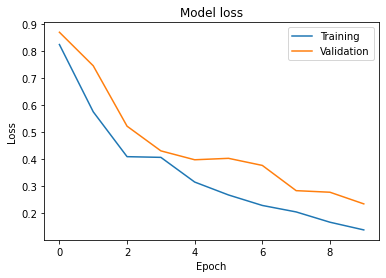

In [14]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [26]:
print("Accuracy : ", cnn.evaluate(test_images, test_labels))

23/23 [==============================] - 49s 2s/step - loss: 0.2775 - accuracy: 0.8997
Accuracy :  [0.27745285630226135, 0.8997214436531067]


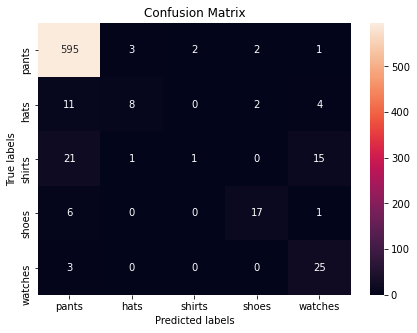

In [27]:
# Confusion matrix for results
cm = confusion_matrix(test_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pants','hats','shirts','shoes','watches']); ax.yaxis.set_ticklabels(['pants','hats','shirts','shoes','watches']);

In [28]:
test_labels=test_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(test_images), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(test_images[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 0:
      print('This is a Pant!')
    elif test_labels[idx[i]] == 1:
      print('This is a Hat!')
    elif test_labels[idx[i]] == 2:
      print('This is a Shirt!')
    elif test_labels[idx[i]] == 3:
      print('This is a Shoe!')
    elif test_labels[idx[i]] == 4:
      print('This is a Watch!')

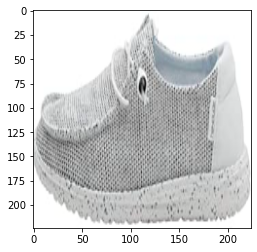

This is a Shoe!


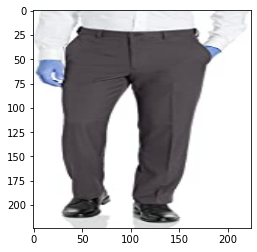

This is a Pant!


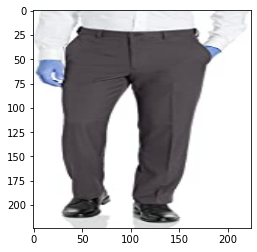

This is a Pant!


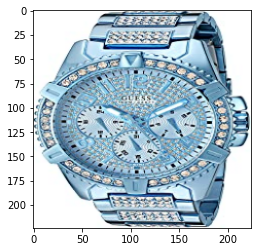

This is a Watch!


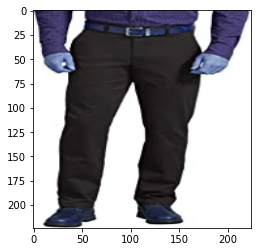

This is a Pant!


In [29]:
get_image_and_class(5)

<b>Image Based Recommendation

The objective of this section is to recommend N products based on the images of the product.

This method is executed with the help of the below steps:

1. Since we are dealing with images, we need to extract features from the images. A pre trained model VGG16 is used to do this.
2. The final output layer is removed as we did not intend to use these models as classifiers.With this step, we are left with the output of a convolutional layer that is pooled and reduced using a global average pooling layer followed by a flatten layer to get a linear feature vector for an image.
3. The next step is to comput the cosine similarity scores between the image features. Sklearn's metrics is used to perform this.
4. The final step is to build the recommendation engine. A function is created that takes in the Product ID, Number of recommendation and returns N recommendations. The similarity score is arranged in descending order and results are outputed based on score.

In [23]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<b>VGG-16</b> is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database

We are loading the images that we downloaded earlier.

In [24]:
imgs_path = (r"C:\Users\Admin\Desktop\seminar\images\\")
imgs_model_width, imgs_model_height = 224,224

In [25]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpeg" in x]

print("number of images:",len(files))

number of images: 1196


In [26]:
_re_digits = re.compile(r'\d+') #We use regex to extract only the pids from file names
pid = []
for element in files:
    pid += [int(n) for n in _re_digits.findall(element)]

In [27]:
 #We add the pid and the image url to a dataframe
df={'PID':pid,'Images':files}
df=pd.DataFrame(df)

In [122]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\seminar\new.csv")

In [23]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [24]:
from PIL import Image
print(Image.__file__)

C:\Users\Admin\anaconda3\lib\site-packages\PIL\Image.py


In [25]:
import Image
print(Image.__file__)

C:\Users\Admin\anaconda3\lib\site-packages\PIL\Image.py


In [26]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [21]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original =load_img(filename, target_size=(224, 224)) #Set the image size to 224*224
    numpy_image = img_to_array(original) #Convert the images to array
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [28]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(1196, 4096)

In [29]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df

,C:\Users\Admin\Desktop\seminar\images\\images0.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1.jpeg,C:\Users\Admin\Desktop\seminar\images\\images10.jpeg,C:\Users\Admin\Desktop\seminar\images\\images100.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1000.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1001.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1002.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1003.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1004.jpeg,C:\Users\Admin\Desktop\seminar\images\\images1005.jpeg,...,C:\Users\Admin\Desktop\seminar\images\\images990.jpeg,C:\Users\Admin\Desktop\seminar\images\\images991.jpeg,C:\Users\Admin\Desktop\seminar\images\\images992.jpeg,C:\Users\Admin\Desktop\seminar\images\\images993.jpeg,C:\Users\Admin\Desktop\seminar\images\\images994.jpeg,C:\Users\Admin\Desktop\seminar\images\\images995.jpeg,C:\Users\Admin\Desktop\seminar\images\\images996.jpeg,C:\Users\Admin\Desktop\seminar\images\\images997.jpeg,C:\Users\Admin\Desktop\seminar\images\\images998.jpeg,C:\Users\Admin\Desktop\seminar\images\\images999.jpeg
C:\Users\Admin\Desktop\seminar\images\\images0.jpeg,1.000000,0.828224,0.784712,0.321055,0.220629,0.220629,0.306477,0.306477,0.321440,0.321440,...,0.313718,0.313718,0.347339,0.347339,0.312015,0.312015,0.284390,0.284390,0.284875,0.284875
C:\Users\Admin\Desktop\seminar\images\\images1.jpeg,0.828224,1.000000,0.898408,0.322928,0.202410,0.202410,0.248141,0.248141,0.219183,0.219183,...,0.260377,0.260377,0.319667,0.319667,0.236833,0.236833,0.256766,0.256766,0.251468,0.251468
C:\Users\Admin\Desktop\seminar\images\\images10.jpeg,0.784712,0.898408,1.000000,0.292824,0.224353,0.224353,0.233888,0.233888,0.234832,0.234832,...,0.272453,0.272453,0.314067,0.314067,0.240940,0.240940,0.283165,0.283165,0.242307,0.242307
C:\Users\Admin\Desktop\seminar\images\\images100.jpeg,0.321055,0.322928,0.292824,1.000000,0.108211,0.108211,0.122111,0.122111,0.118452,0.118452,...,0.120377,0.120377,0.136913,0.136913,0.128113,0.128113,0.117830,0.117830,0.120373,0.120373
C:\Users\Admin\Desktop\seminar\images\\images1000.jpeg,0.220629,0.202410,0.224353,0.108211,1.000000,1.000000,0.562462,0.562462,0.562462,0.562462,...,0.663322,0.663322,0.517224,0.517224,0.623424,0.623424,0.659243,0.659243,0.559277,0.559277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C:\Users\Admin\Desktop\seminar\images\\images995.jpeg,0.312015,0.236833,0.240940,0.128113,0.623424,0.623424,0.642110,0.642110,0.699195,0.699195,...,0.664041,0.664041,0.685614,0.685614,1.000000,1.000000,0.569480,0.569480,0.708005,0.708005
C:\Users\Admin\Desktop\seminar\images\\images996.jpeg,0.284390,0.256766,0.283165,0.117830,0.659243,0.659243,0.565203,0.565203,0.590211,0.590211,...,0.632509,0.632509,0.516652,0.516652,0.569480,0.569480,1.000000,1.000000,0.530379,0.530379
C:\Users\Admin\Desktop\seminar\images\\images997.jpeg,0.284390,0.256766,0.283165,0.117830,0.659243,0.659243,0.565203,0.565203,0.590211,0.590211,...,0.632509,0.632509,0.516652,0.516652,0.569480,0.569480,1.000000,1.000000,0.530379,0.530379
C:\Users\Admin\Desktop\seminar\images\\images998.jpeg,0.284875,0.251468,0.242307,0.120373,0.559277,0.559277,0.768623,0.768623,0.542914,0.542914,...,0.699478,0.699478,0.733059,0.733059,0.708005,0.708005,0.530379,0.530379,1.000000,1.000000


In [32]:
# function to retrieve the most similar products for a given one

def image_recommend_1(pid,num_recommend = 5):
    
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar images to retrieve
    
    """
    
    given_img=df['Images'][df['PID']==pid].item()
    
    #Displaying the original product- Image, PID, Name, Brand
    
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    
    print("\nProduct ID : ",pid)
#    print("Title : ",df['product_name'][df['PID']==pid].item())
   
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    
    # getting the indexes and scores of the N most similar products
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_recommend+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_recommend+1]
    
    _re_digits = re.compile(r'\d+') #We use regex to extract only the pids from file names
    closest_imgs_pid = []
    for element in closest_imgs:
        closest_imgs_pid += [int(n) for n in _re_digits.findall(element)]
    
    # Displaying the recommended products- Image, PID, Name, Brand and Similarity Score

    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------") 
    
    
    for i in range(0,len(closest_imgs)):
        print("\nProduct ID : ",closest_imgs_pid[i])
#        print("Title : ",df['product_name'][df['PID']==closest_imgs_pid[i]].item())
       
        print("similarity score : ",closest_imgs_scores[i])
        
        
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
             

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  500


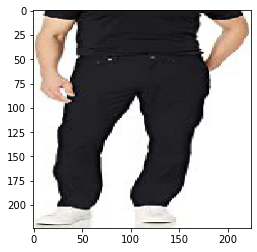

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  501
similarity score :  1.0000001


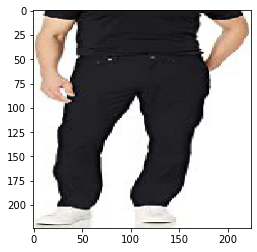


Product ID :  742
similarity score :  0.8201427


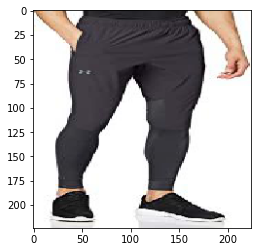


Product ID :  741
similarity score :  0.8201427


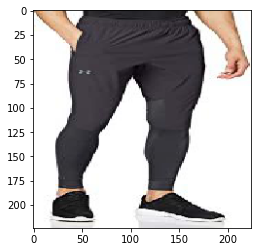


Product ID :  539
similarity score :  0.78910446


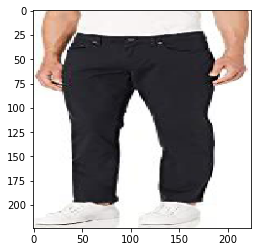


Product ID :  538
similarity score :  0.78910446


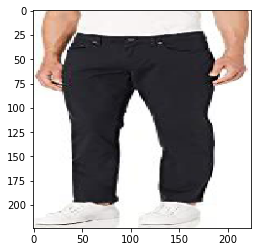

In [36]:
image_recommend_1(500,5)